## Intelligent Robotics Python Library 사용 예제 2
## Written by 최동일, dongilc@mju.ac.kr
#### BSD License.

In [1]:
import intelligent_robotics as ir
import sympy
sympy.init_printing()

## 예제 2. 예제 5.4의 RP형 로봇

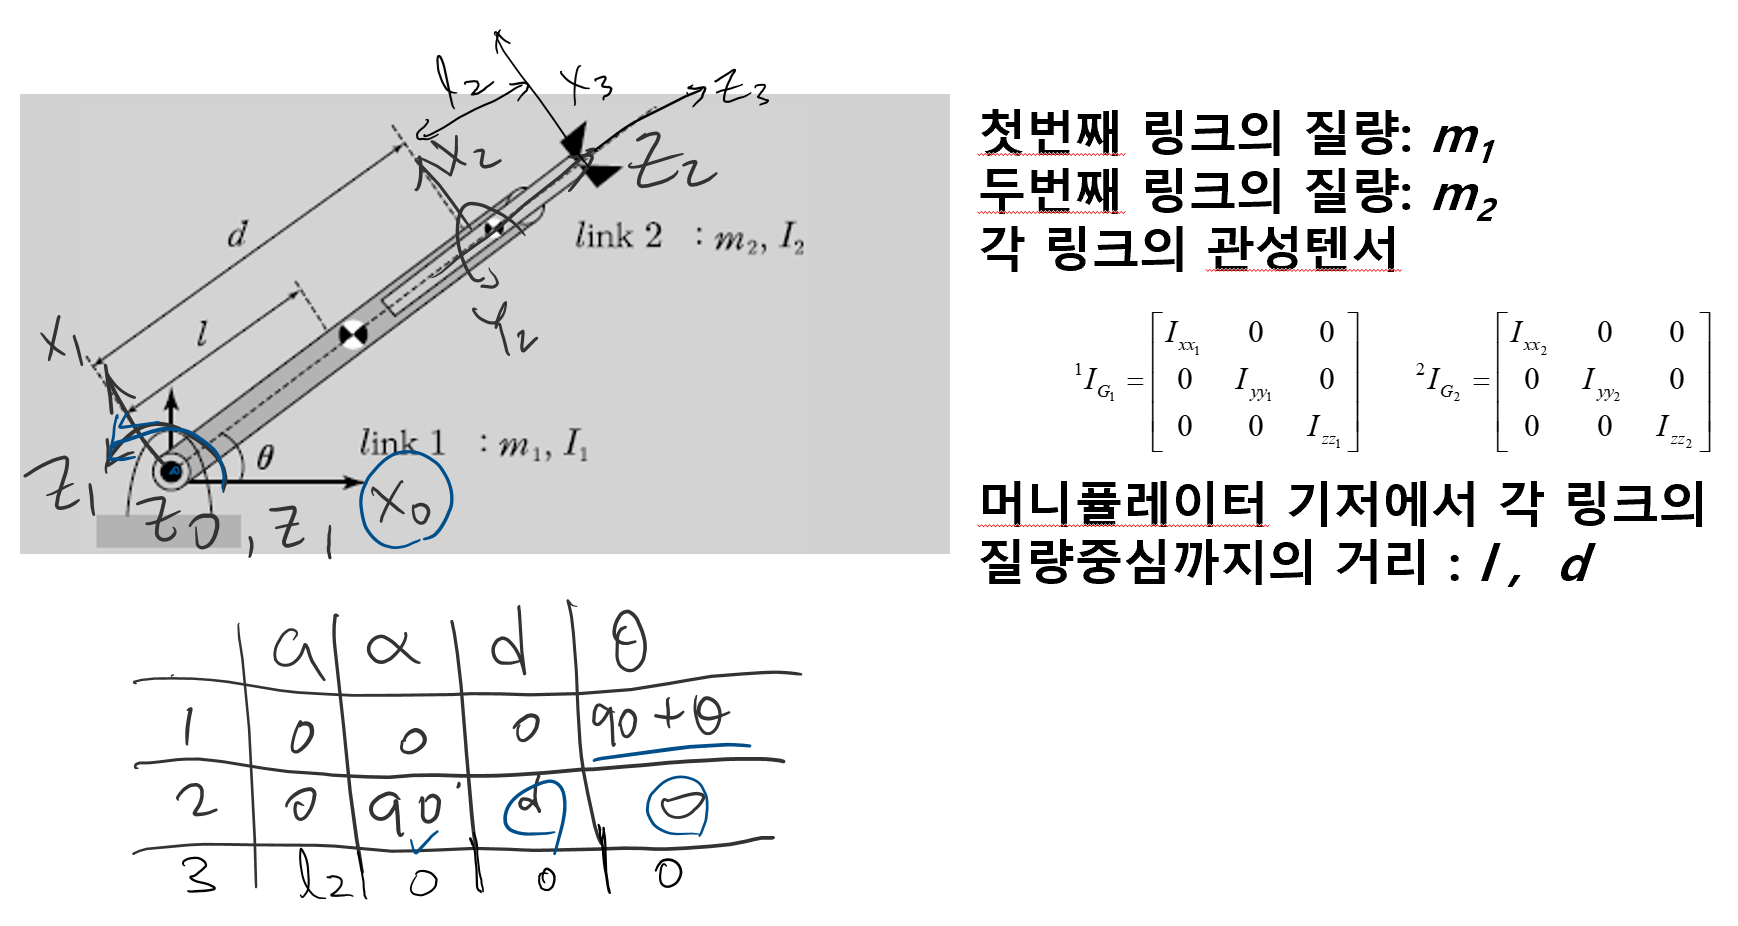

In [2]:
from IPython.display import Image
Image('figure/example5.4.PNG', width=500)

In [3]:
theta,d = sympy.symbols('theta,d')

In [4]:
l,l2,IG1,IG2,m1,m2 = sympy.symbols('l,l2,IG1,IG2,m1,m2')

#### DH Parameter를 이용한 동차변환 구하기

In [5]:
T01 = ir.DH(0,0,0,theta + sympy.rad(90))

In [6]:
T12 = ir.DH(0,sympy.rad(90),d,0)

In [7]:
T23 = ir.DH(l2,0,0,0)

In [8]:
T01, T12, T23

⎛⎡-sin(θ)  -cos(θ)  0  0⎤  ⎡1  0  0   0 ⎤  ⎡1  0  0  l₂⎤⎞
⎜⎢                      ⎥  ⎢            ⎥  ⎢           ⎥⎟
⎜⎢cos(θ)   -sin(θ)  0  0⎥  ⎢0  0  -1  -d⎥  ⎢0  1  0  0 ⎥⎟
⎜⎢                      ⎥, ⎢            ⎥, ⎢           ⎥⎟
⎜⎢   0        0     1  0⎥  ⎢0  1  0   0 ⎥  ⎢0  0  1  0 ⎥⎟
⎜⎢                      ⎥  ⎢            ⎥  ⎢           ⎥⎟
⎝⎣   0        0     0  1⎦  ⎣0  0  0   1 ⎦  ⎣0  0  0  1 ⎦⎠

#### 자코비안 구하기

In [9]:
theta,d = ir.dynamicsymbols('theta,d')
w_0_0 = sympy.Matrix([[0],[0],[0]])
w_1_1 = ir.get_angular_vel_R(T01,w_0_0,theta.diff())
w_2_2 = ir.get_angular_vel_P(T12,w_1_1)
w_3_3 = ir.get_angular_vel_P(T23,w_2_2)

In [10]:
w_1_1,w_2_2,w_3_3

⎛⎡   0    ⎤  ⎡   0    ⎤  ⎡   0    ⎤⎞
⎜⎢        ⎥  ⎢        ⎥  ⎢        ⎥⎟
⎜⎢   0    ⎥  ⎢d       ⎥  ⎢d       ⎥⎟
⎜⎢        ⎥, ⎢──(θ(t))⎥, ⎢──(θ(t))⎥⎟
⎜⎢d       ⎥  ⎢dt      ⎥  ⎢dt      ⎥⎟
⎜⎢──(θ(t))⎥  ⎢        ⎥  ⎢        ⎥⎟
⎝⎣dt      ⎦  ⎣   0    ⎦  ⎣   0    ⎦⎠

In [11]:
v_0_0 = sympy.Matrix([[0],[0],[0]])
v_1_1 = ir.get_linear_vel_R(T01,w_0_0,v_0_0)
v_2_2 = ir.get_linear_vel_P(T12,w_1_1,v_1_1,d.diff())
v_3_3 = ir.get_linear_vel_P(T23,w_2_2,v_2_2,0)

In [12]:
v_1_1,v_2_2,v_3_3

⎛     ⎡  d       ⎤  ⎡         d              ⎤⎞
⎜     ⎢d⋅──(θ(t))⎥  ⎢       d⋅──(θ(t))       ⎥⎟
⎜⎡0⎤  ⎢  dt      ⎥  ⎢         dt             ⎥⎟
⎜⎢ ⎥  ⎢          ⎥  ⎢                        ⎥⎟
⎜⎢0⎥, ⎢    0     ⎥, ⎢           0            ⎥⎟
⎜⎢ ⎥  ⎢          ⎥  ⎢                        ⎥⎟
⎜⎣0⎦  ⎢ d        ⎥  ⎢     d          d       ⎥⎟
⎜     ⎢ ──(d(t)) ⎥  ⎢- l₂⋅──(θ(t)) + ──(d(t))⎥⎟
⎝     ⎣ dt       ⎦  ⎣     dt         dt      ⎦⎠

In [14]:
qd = sympy.Matrix([[theta.diff()],[d.diff()]])

In [15]:
J_3_3 = ir.get_Jacobian_from_vel(w_3_3,v_3_3,qd)

In [16]:
# Body Jacobian
J_3_3

⎡ d   0⎤
⎢      ⎥
⎢ 0   0⎥
⎢      ⎥
⎢-l₂  1⎥
⎢      ⎥
⎢ 0   0⎥
⎢      ⎥
⎢ 1   0⎥
⎢      ⎥
⎣ 0   0⎦

In [17]:
w_0_3 = ir.get_R_from_T(T01*T12*T23)*w_3_3
v_0_3 = ir.get_R_from_T(T01*T12*T23)*v_3_3
J_0_3 = ir.get_Jacobian_from_vel(w_0_3,v_0_3,qd)

In [18]:
# Space Jacobian
J_0_3

⎡-d⋅sin(θ) - l₂⋅cos(θ)  cos(θ)⎤
⎢                             ⎥
⎢d⋅cos(θ) - l₂⋅sin(θ)   sin(θ)⎥
⎢                             ⎥
⎢          0              0   ⎥
⎢                             ⎥
⎢          0              0   ⎥
⎢                             ⎥
⎢          0              0   ⎥
⎢                             ⎥
⎣          1              0   ⎦

#### 머니퓰레이터 정역학 구하기

In [19]:
f_x, f_y, f_z = sympy.symbols('f_x, f_y, f_z')

In [20]:
f_3_3 = sympy.Matrix([[f_x],[f_y],[f_z]])
n_3_3 = sympy.Matrix([[0],[0],[0]])

In [21]:
f_2_2 = ir.get_statics_force_i(T23, f_3_3)
f_1_1 = ir.get_statics_force_i(T12, f_2_2)

In [22]:
f_2_2, f_1_1

⎛⎡fₓ ⎤  ⎡ fₓ ⎤⎞
⎜⎢   ⎥  ⎢    ⎥⎟
⎜⎢f_y⎥, ⎢-f_z⎥⎟
⎜⎢   ⎥  ⎢    ⎥⎟
⎝⎣f_z⎦  ⎣f_y ⎦⎠

In [23]:
n_2_2 = ir.get_statics_torque_i(T23, n_3_3, f_2_2)
n_1_1 = ir.get_statics_torque_i(T12, n_2_2, f_1_1)

In [24]:
n_2_2, n_1_1

⎛⎡   0   ⎤  ⎡   -d⋅f_y    ⎤⎞
⎜⎢       ⎥  ⎢             ⎥⎟
⎜⎢-f_z⋅l₂⎥, ⎢   -f_y⋅l₂   ⎥⎟
⎜⎢       ⎥  ⎢             ⎥⎟
⎝⎣f_y⋅l₂ ⎦  ⎣d⋅fₓ - f_z⋅l₂⎦⎠

In [25]:
T = sympy.Matrix([[n_1_1[2]],[f_2_2[2]]])
F = sympy.Matrix([[f_x],[f_y],[f_z]])

In [26]:
T, F

⎛                 ⎡fₓ ⎤⎞
⎜⎡d⋅fₓ - f_z⋅l₂⎤  ⎢   ⎥⎟
⎜⎢             ⎥, ⎢f_y⎥⎟
⎜⎣     f_z     ⎦  ⎢   ⎥⎟
⎝                 ⎣f_z⎦⎠

In [27]:
# T = J^T * F
# tau1           fx
# tau2  =  J^T * fy
# tau3           fz
Jt = ir.get_Jacobian_from_ft(F,T)

In [28]:
# 정역학식을 이용한 자코비안 구하기
J = Jt.T

In [30]:
# Body Jacobian
J

⎡ d   0⎤
⎢      ⎥
⎢ 0   0⎥
⎢      ⎥
⎣-l₂  1⎦

In [31]:
# 속도전파식을 이용해 구한 자코비안과 정역학식을 이용해 구한 자코비안의 결과가 같은지 체크. 모두 0으로 나오면 OK
sympy.simplify(J_3_3[0:3,:] - J)

⎡0  0⎤
⎢    ⎥
⎢0  0⎥
⎢    ⎥
⎣0  0⎦

#### 머니퓰레이터 동역학 구하기

In [30]:
# Netwon-Euler Method. 1. Forward Iteration

In [31]:
w_0_0 = sympy.Matrix([[0],[0],[0]])
w_1_1 = ir.get_angular_vel_R(T01,w_0_0,th.diff())
w_2_2 = ir.get_angular_vel_P(T12,w_1_1)
w_3_3 = ir.get_angular_vel_R(T23,w_2_2,0)
wd_0_0 = sympy.Matrix([[0],[0],[0]])
wd_1_1 = ir.get_angular_acc_R(T01,w_0_0,wd_0_0,th.diff(),th.diff().diff())
wd_2_2 = ir.get_angular_acc_P(T12,wd_1_1)
wd_3_3 = ir.get_angular_acc_R(T23,w_2_2,wd_2_2,0,0)

In [32]:
v_0_0 = sympy.Matrix([[0],[0],[0]])
v_1_1 = ir.get_linear_vel_R(T01,w_0_0,v_0_0)
v_2_2 = ir.get_linear_vel_P(T12,w_1_1,v_1_1,d.diff())
v_3_3 = ir.get_linear_vel_R(T23,w_2_2,v_2_2)
vd_0_0 = sympy.Matrix([[0],[0],[0]])
vd_1_1 = ir.get_linear_acc_R(T01,w_0_0,wd_0_0,vd_0_0)
vd_2_2 = ir.get_linear_acc_P(T12,w_1_1,wd_1_1,w_2_2,v_1_1,vd_1_1,d.diff(),d.diff().diff())
vd_3_3 = ir.get_linear_acc_R(T23,w_2_2,wd_2_2,vd_2_2)

In [33]:
r_1_G1 = sympy.Matrix([[0],[-l],[0]])
r_2_G2 = sympy.Matrix([[0],[0],[0]])
v_1_G1 = ir.get_com_vel(v_1_1,w_1_1,r_1_G1)
v_2_G2 = ir.get_com_vel(v_2_2,w_2_2,r_2_G2)
vd_1_G1 = ir.get_com_acc(vd_1_1,w_1_1,wd_1_1,r_1_G1)
vd_2_G2 = ir.get_com_acc(vd_2_2,w_2_2,wd_2_2,r_2_G2)

In [34]:
# Netwon-Euler Method. 2. Inverse Iteration

In [35]:
g = sympy.symbols('g')

In [36]:
f_3_3 = sympy.Matrix([[0],[0],[0]])
n_3_3 = sympy.Matrix([[0],[0],[0]])
g_0 = sympy.Matrix([[0],[-g],[0]])

In [37]:
f_2_2 = ir.get_dynamics_force_i(T23,T01*T12,m2,g_0,vd_2_G2,f_3_3)
f_1_1 = ir.get_dynamics_force_i(T12,T01,m1,g_0,vd_1_G1,f_2_2)

In [38]:
# 참고 - 실행시간이 좀 오래걸림.
Ixx1,Iyy1,Izz1,Ixx2,Iyy2,Izz2 = sympy.symbols('Ixx1,Iyy1,Izz1,Ixx2,Iyy2,Izz2')
I_1_G1 = sympy.Matrix([[Ixx1,0,0],[0,Iyy1,0],[0,0,Izz1]])
I_2_G2 = sympy.Matrix([[Ixx2,0,0],[0,Iyy2,0],[0,0,Izz2]])
n_2_2 = ir.get_dynamics_torque_i(T23,n_3_3,f_2_2,f_3_3,w_2_2,wd_2_2,r_2_G2,I_2_G2)
n_1_1 = ir.get_dynamics_torque_i(T12,n_2_2,f_1_1,f_2_2,w_1_1,wd_1_1,r_1_G1,I_1_G1)

In [39]:
tau = sympy.Matrix([[n_1_1[2]],[f_2_2[2]]])

In [40]:
qdd = sympy.Matrix([[th.diff().diff()],[d.diff().diff()]])
M_ne, C_ne, G_ne = ir.get_EoM_from_T(tau,qdd,g)

In [41]:
M_ne

⎡               2          2       ⎤
⎢Iyy₂ + Izz₁ + l ⋅m₁ + m₂⋅d (t)  0 ⎥
⎢                                  ⎥
⎣              0                 m₂⎦

In [42]:
C_ne

⎡          d        d        ⎤
⎢2⋅m₂⋅d(t)⋅──(d(t))⋅──(th(t))⎥
⎢          dt       dt       ⎥
⎢                            ⎥
⎢                       2    ⎥
⎢            ⎛d        ⎞     ⎥
⎢   -m₂⋅d(t)⋅⎜──(th(t))⎟     ⎥
⎣            ⎝dt       ⎠     ⎦

In [43]:
G_ne

⎡g⋅(l⋅m₁ + m₂⋅d(t))⋅cos(th(t))⎤
⎢                             ⎥
⎣       g⋅m₂⋅sin(th(t))       ⎦

In [44]:
# Lagrangian Method

In [45]:
# 운동에너지
T = ir.get_kinectic_energy(m1,v_1_G1,I_1_G1,w_1_1) + ir.get_kinectic_energy(m2,v_2_G2,I_2_G2,w_2_2)

In [46]:
T

⎡                    2                       2                        2       
⎢         ⎛d        ⎞             ⎛d        ⎞         2    ⎛d        ⎞        
⎢0.5⋅Iyy₂⋅⎜──(th(t))⎟  + 0.5⋅Izz₁⋅⎜──(th(t))⎟  + 0.5⋅l ⋅m₁⋅⎜──(th(t))⎟  + 0.5⋅
⎣         ⎝dt       ⎠             ⎝dt       ⎠              ⎝dt       ⎠        

                    2                    2⎤
    2    ⎛d        ⎞           ⎛d       ⎞ ⎥
m₂⋅d (t)⋅⎜──(th(t))⎟  + 0.5⋅m₂⋅⎜──(d(t))⎟ ⎥
         ⎝dt       ⎠           ⎝dt      ⎠ ⎦

In [47]:
# 위치에너지 구하기

In [48]:
T02 = T01*T12
V = ir.get_potential_energy(T01,m1,g_0,r_1_G1) + ir.get_potential_energy(T02,m2,g_0,r_2_G2)

In [49]:
V

[g⋅l⋅m₁⋅sin(th(t)) + g⋅m₂⋅d(t)⋅sin(th(t))]

In [50]:
# 라그랑지안 구하기
L = ir.get_lagrangian(T,V)

In [51]:
L

⎡                    2                       2                                
⎢         ⎛d        ⎞             ⎛d        ⎞                                 
⎢0.5⋅Iyy₂⋅⎜──(th(t))⎟  + 0.5⋅Izz₁⋅⎜──(th(t))⎟  - g⋅l⋅m₁⋅sin(th(t)) - g⋅m₂⋅d(t)
⎣         ⎝dt       ⎠             ⎝dt       ⎠                                 

                                   2                           2              
                   2    ⎛d        ⎞            2    ⎛d        ⎞           ⎛d  
⋅sin(th(t)) + 0.5⋅l ⋅m₁⋅⎜──(th(t))⎟  + 0.5⋅m₂⋅d (t)⋅⎜──(th(t))⎟  + 0.5⋅m₂⋅⎜──(
                        ⎝dt       ⎠                 ⎝dt       ⎠           ⎝dt 

      2⎤
     ⎞ ⎥
d(t))⎟ ⎥
     ⎠ ⎦

In [52]:
q = sympy.Matrix([[th],[d]])
qd = sympy.Matrix([[th.diff()],[d.diff()]])
tau = ir.get_torque_from_L(L,q,qd)

In [53]:
# Get Equation of Motion

In [54]:
tau

⎡           2                     2                                           
⎢          d                     d                                            
⎢1.0⋅Iyy₂⋅───(th(t)) + 1.0⋅Izz₁⋅───(th(t)) + g⋅(l⋅m₁ + m₂⋅d(t))⋅cos(th(t)) + 1
⎢           2                     2                                           
⎢         dt                    dt                                            
⎢                                                                             
⎢                                                   ⎛                         
⎢                                                   ⎜                         
⎢                                              - m₂⋅⎜-g⋅sin(th(t)) + 1.0⋅d(t)⋅
⎢                                                   ⎝                         
⎣                                                                             

           2                         2                                        
    2     d                   2     d              

In [55]:
qdd = sympy.Matrix([[th.diff().diff()],[d.diff().diff()]])
M_l, C_l, G_l = ir.get_EoM_from_T(tau,qdd,g)

In [56]:
M_l

⎡                           2              2           ⎤
⎢1.0⋅Iyy₂ + 1.0⋅Izz₁ + 1.0⋅l ⋅m₁ + 1.0⋅m₂⋅d (t)    0   ⎥
⎢                                                      ⎥
⎣                      0                         1.0⋅m₂⎦

In [57]:
C_l

⎡            d        d        ⎤
⎢2.0⋅m₂⋅d(t)⋅──(d(t))⋅──(th(t))⎥
⎢            dt       dt       ⎥
⎢                              ⎥
⎢                          2   ⎥
⎢               ⎛d        ⎞    ⎥
⎢  -1.0⋅m₂⋅d(t)⋅⎜──(th(t))⎟    ⎥
⎣               ⎝dt       ⎠    ⎦

In [58]:
G_l

⎡g⋅(l⋅m₁ + m₂⋅d(t))⋅cos(th(t))⎤
⎢                             ⎥
⎣       g⋅m₂⋅sin(th(t))       ⎦

In [59]:
# Newton-Euler 방법과 Lagrangian 방법의 결과가 같은지 체크. 모두 0으로 나오면 OK
sympy.simplify(M_ne - M_l)

⎡0  0⎤
⎢    ⎥
⎣0  0⎦

In [60]:
# Newton-Euler 방법과 Lagrangian 방법의 결과가 같은지 체크. 모두 0으로 나오면 OK
sympy.simplify(C_ne - C_l)

⎡0⎤
⎢ ⎥
⎣0⎦

In [61]:
# Newton-Euler 방법과 Lagrangian 방법의 결과가 같은지 체크. 모두 0으로 나오면 OK
sympy.simplify(G_ne - G_l)

⎡0⎤
⎢ ⎥
⎣0⎦